In [6]:
from etherscan import Etherscan
import web3
from web3 import Web3
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
eth = Etherscan("56WF53RCMFAFTW1Z7BYVXEVBWZU9U7PQWY") # key in quotation marks
infura_access = "https://mainnet.infura.io/v3/b41cb33a082f49618bac1435fe45a96f"
w3 = Web3(Web3.HTTPProvider(infura_access))
plt.rcParams["figure.figsize"] = (30,10)
crookz_ca = "0x7dA30048214E112Dbc41A645e37f9640ac62799E"
hws_ca = "0xFdbb8329f5755c4cD0A1Ac172D8a4dF66969c1ef"
latest_block = w3.eth.get_block('latest').number
address ="0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2"

In [30]:
def get_contract_creator(contract_address):
    for item in eth.get_internal_txs_by_address(contract_address, 0, latest_block, 'asc'):
        if item['type'] == 'create':
            return item['from']
        
def map_from_contract_factory(factory_ca):
    G = nx.Graph()
    edges = []
    edge_labels = {}
    #Get contract creator
    creator_address = get_contract_creator(factory_ca)
    #Add creator to DAG
    edges.append([creator_address, factory_ca])
    edge_labels[(creator_address,factory_ca)] = "Contract Creation"
    
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>')  #<-- This is the "CurvedFilledB" class
    return nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
#so i want a function thats filters for administrative level functions within the contract and maps who accesses these functions
#eth.get_contract_source_code("0x3aF7f85584184F63b533e547E255AE7265EE6A90")

#Here, i know this is a contract
def handle_contract(contract_address):
    
    return ""
def handle_address(contract_address):


In [7]:
pd.DataFrame(eth.get_normal_txs_by_address(address, 0, latest_block, 'asc'))

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations
0,14045677,1642724254,0x70c2b953e84cea8273d2e4150bc832543e3d2e2b6ce3...,0,0x01a647e1d50a0bee47b139f3fbee0e42ac24941cec85...,160,0x19f20b53a11f699d22f238818704bd923645289a,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,950000000000000000,21000,169466665617,0,1,0x,,13833397,21000,38145
1,14050299,1642787019,0x7857b3aa863b3d4bd6347cb2e3b8b8a1cd24d60bcb8d...,0,0x96bbba91a5bfd2ada9285d057e38baa7c54743bbb32a...,155,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,,0,3010401,204871291434,0,1,0x60806040526012805462ffffff191660011790553480...,0xda5fa2b5073b6537a7f022c388ccd9524023a8db,13563475,3010401,33523
2,14050345,1642787612,0x4983b999291d87132594230a55722fce679365d48414...,34,0x36a3504293b8ddb918fb1744764c0cf8fc5480e08521...,237,0x235f882095414a07cce337278664187caea30b0c,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,660000000000000000,21000,151808224931,0,1,0x,,13453985,21000,33477
3,14050357,1642787780,0x7f674ab955f5562d465dcf6db635ffccbaf0e03e2ff0...,1,0xe3a445789b4e06e4368d3da7a26ccd66305ebfc02fa0...,23,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,,0,3011721,187540432321,0,1,0x60806040526012805462ffffff191660011790553480...,0xfdbb8329f5755c4cd0a1ac172d8a4df66969c1ef,4478391,3011721,33465
4,14050473,1642789151,0x737250d3d2a23e30a0a421ef4a24887b91a64be3efa3...,2,0xed0a03ea713c6d7d61a4a92312650ff239d66215c533...,203,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,0xfdbb8329f5755c4cd0a1ac172d8a4df66969c1ef,0,112252,178138813820,0,1,0xf2c4ce1e000000000000000000000000000000000000...,,21287558,74835,33349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,14082973,1643222883,0xe628764a63cacd21607fe4f1fd0a14bb26dc825d609f...,23,0xd5902089f646e945bf7ca01e76d5c9c35ee458ff5186...,257,0x8b7ddd8099abf175718cd6dba799f29bc5fa5719,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,150000000000000000,21000,147957117738,0,1,0x,,22135649,21000,849
633,14083006,1643223351,0x6437eb25e25cfbbbcdd405bf259c0a32e656a74fc2ba...,418,0x75a3c81b9eab03e8ed0e2f4a20c9caa240b039fc6a43...,36,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,0xfdbb8329f5755c4cd0a1ac172d8a4df66969c1ef,0,106441,185515302745,0,1,0x23b872dd0000000000000000000000004640f995a4f2...,,4004953,96841,816
634,14083601,1643231555,0x155445004151d3ca7c5987590e7d6a1437fe36d5f18d...,0,0x5b1d7382ebb6d26819addbfbde3e5fbce26f796dc621...,60,0xd799223ccc35124a02d61d89ca2e677b248c1d7f,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,250000000000000000,21000,161930875195,0,1,0x,,4423737,21000,221
635,14083792,1643234265,0x1f96233d4ab273726cab58a3eb52dac1f98f474e1f08...,419,0xef663122f38d6e1be0a8e334b046b749eac5723ac2fa...,272,0x4640f995a4f2a73d2f6091d370d5307c1cbc55a2,0xfdbb8329f5755c4cd0a1ac172d8a4df66969c1ef,0,106441,197637520382,0,1,0x23b872dd0000000000000000000000004640f995a4f2...,,27636699,96841,30


{'blockNumber': '14014237', 'timeStamp': '1642305840', 'hash': '0xc1f2603858ae48fb69b6259e4fadbb6662d9be1510f4ba7d37620e62c7b36183', 'from': '0x370a695f879b665db5745de917105208a1dc61fd', 'to': '', 'value': '0', 'contractAddress': '0x7da30048214e112dbc41a645e37f9640ac62799e', 'input': '', 'type': 'create', 'gas': '206210', 'gasUsed': '9031', 'traceId': '0_0', 'isError': '0', 'errCode': ''}


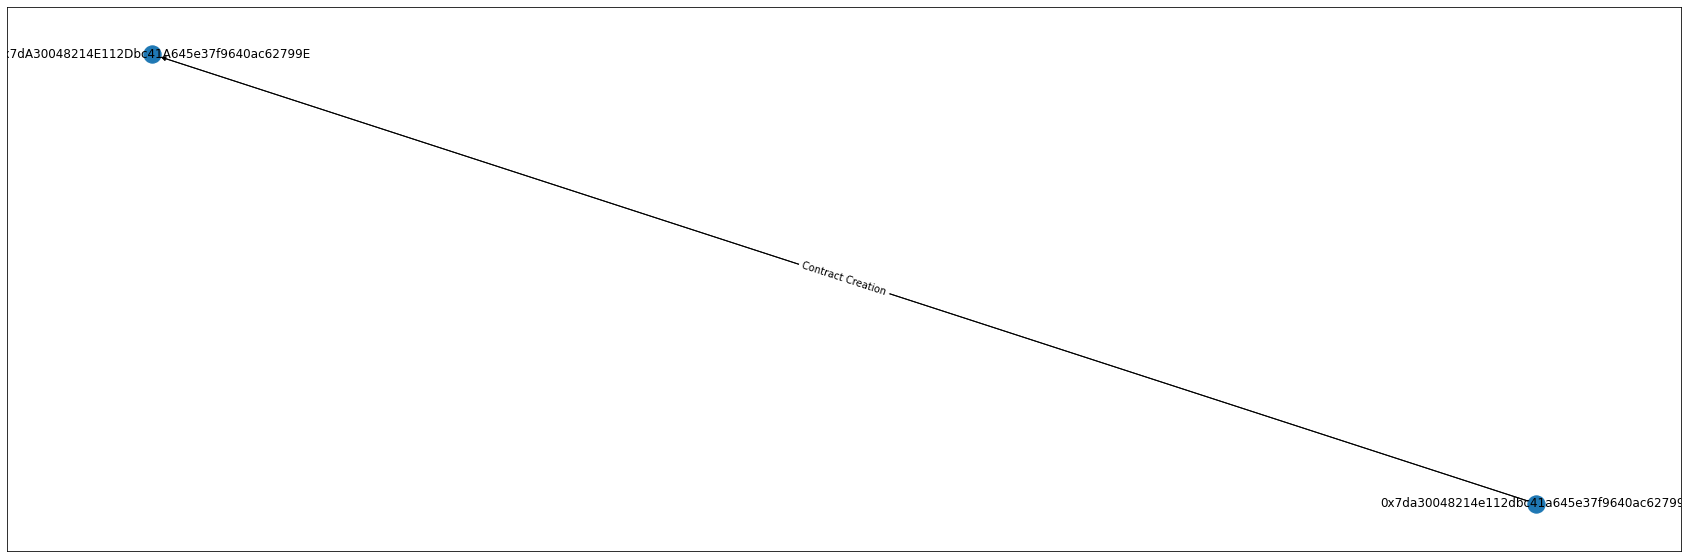

In [33]:
map_from_contract_factory(crookz_ca)
plt.show()

In [7]:
G = nx.Graph()
edges = []
edge_labels = {}
#Get contract creator
factory_ca = crookz_ca
creator_address = get_contract_creator(factory_ca)
#Add creator to DAG
edges.append([creator_address, factory_ca])
edge_labels[(creator_address,factory_ca)] = "Contract Creation"



#G.add_edges_from(edges)
#pos = nx.spring_layout(G)
#nx.draw_networkx(G, pos)
#nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>')  #<-- This is the "CurvedFilledB" class
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

{'blockNumber': '14014237', 'timeStamp': '1642305840', 'hash': '0xc1f2603858ae48fb69b6259e4fadbb6662d9be1510f4ba7d37620e62c7b36183', 'from': '0x370a695f879b665db5745de917105208a1dc61fd', 'to': '', 'value': '0', 'contractAddress': '0x7da30048214e112dbc41a645e37f9640ac62799e', 'input': '', 'type': 'create', 'gas': '206210', 'gasUsed': '9031', 'traceId': '0_0', 'isError': '0', 'errCode': ''}


In [1]:

#Work out if an account or a contract
#if a contract, it should have internal transactions
#eth.get_contract_source_code(get_contract_creator(creator_address))

[{'SourceCode': '',
  'ABI': 'Contract source code not verified',
  'ContractName': '',
  'CompilerVersion': '',
  'OptimizationUsed': '',
  'Runs': '',
  'ConstructorArguments': '',
  'EVMVersion': 'Default',
  'Library': '',
  'LicenseType': 'Unknown',
  'Proxy': '0',
  'Implementation': '',
  'SwarmSource': ''}]

In [4]:
from opensea import OpenseaAPI

api = OpenseaAPI(apikey="37d622db4b7c49d98cf51c372c2448d0")
stats = api.collection_stats(collection_slug="the-cyclops-monkey-club")
result = api.collection(collection_slug="the-cyclops-monkey-club")

